In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import models, Sequential, layers, optimizers
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt

import os
import numpy as np
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.utils import np_utils

print(tf.__version__)
print(keras.__version__)



2.2.0-rc4
2.3.0-tf


Using TensorFlow backend.


In [0]:
tf.random.set_seed(13)

# Datasets shapes

In [0]:
chosen_dataset = "cifar"
if chosen_dataset is "mnist":
  dataset_shape = (28,28,1)
  number_classes = 10
elif chosen_dataset is "cifar":
  dataset_shape = (32,32,3)
  number_classes = 10

# VGG Configurations

## D

In [18]:
D_model = Sequential()

D_model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=dataset_shape))
D_model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
D_model.add(layers.MaxPool2D((2,2),strides=(2,2),padding='same'))

D_model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
D_model.add(layers.MaxPool2D((2,2),strides=(2,2),padding='same'))

D_model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
D_model.add(layers.MaxPool2D((2,2),strides=(2,2),padding='same'))

D_model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
D_model.add(layers.MaxPool2D((2,2),strides=(2,2),padding='same'))

D_model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
D_model.add(layers.MaxPool2D((2,2),strides=(2,2),padding='same'))

D_model.add(layers.Flatten())
D_model.add(layers.Dense(4096,activation='relu'))
D_model.add(layers.Dense(4096,activation='relu'))

D_model.add(layers.Dense(10,activation='softmax'))

D_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 256)        

# MNIST dataset

In [7]:
mnist = tf.keras.datasets.mnist #load mnist dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data() # by using this command you load the data
x_train, x_test = x_train / 255.0, x_test / 255.0 # change every value from 0 - 255 to 0 - 1, you don't modify labels because they are from 0 -9 (digits) 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
regular_x_train = x_train
regular_x_test = x_test


11493376/11490434 [==============================] - 0s 0us/step


In [8]:
print(x_train.shape)

(60000, 28, 28)


Train Set Size = 60000 images
Test Set Size = 10000 images


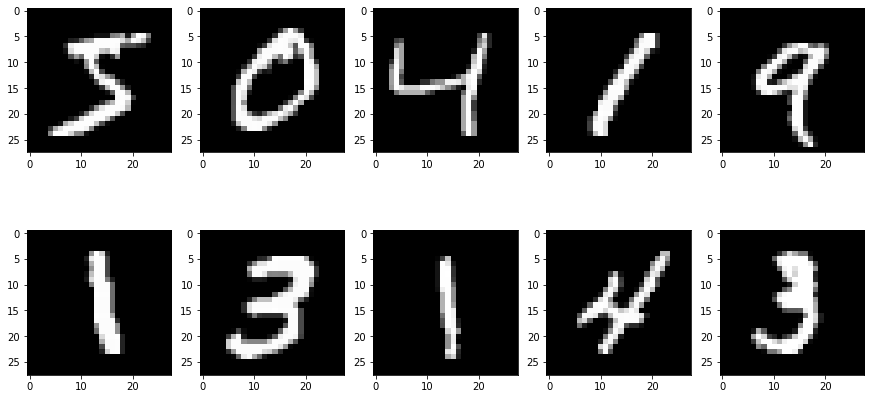

Labels : [5 0 4 1 9]
Labels : [1 3 1 4 3]


In [9]:
print("Train Set Size = {} images".format(y_train.shape[0]))
print("Test Set Size = {} images".format(y_test.shape[0]))

fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_train[i], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_train[i+6], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("Labels : {}".format(y_train[0:5]))
print("Labels : {}".format(y_train[6:11]))


In [0]:
# single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

y_train_onehot = keras.utils.to_categorical(y_train, number_classes)
y_test_onehot = keras.utils.to_categorical(y_test, number_classes)

In [0]:
D_model.compile(
   loss=tf.keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
   optimizer=tf.keras.optimizers.RMSprop(1e-4),
   metrics=['accuracy']
)

In [12]:
EPOCHS = 50

results = D_model.fit(
    x_train,y_train_onehot,batch_size=128,epochs=EPOCHS,validation_data=(x_test,y_test_onehot),
    verbose=1,shuffle=True)


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 27s 446us/step - loss: 0.7197 - accuracy: 0.7336 - val_loss: 0.0941 - val_accuracy: 0.9760
Epoch 2/50
60000/60000 [==============================] - 20s 328us/step - loss: 0.1013 - accuracy: 0.9725 - val_loss: 0.0441 - val_accuracy: 0.9890
Epoch 3/50
60000/60000 [==============================] - 20s 328us/step - loss: 0.0595 - accuracy: 0.9848 - val_loss: 0.0411 - val_accuracy: 0.9897
Epoch 4/50
60000/60000 [==============================] - 20s 328us/step - loss: 0.0477 - accuracy: 0.9887 - val_loss: 0.0317 - val_accuracy: 0.9914
Epoch 5/50
60000/60000 [==============================] - 20s 330us/step - loss: 0.0350 - accuracy: 0.9916 - val_loss: 0.0431 - val_accuracy: 0.9896
Epoch 6/50
60000/60000 [==============================] - 20s 328us/step - loss: 0.0305 - accuracy: 0.9930 - val_loss: 0.0357 - val_accuracy: 0.9922
Epoch 7/50
60000/60000 [==============================] 

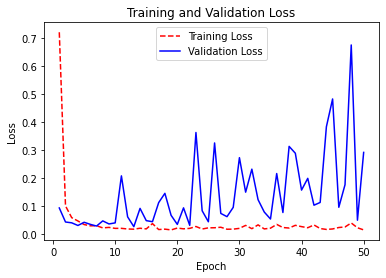

In [13]:
# Get training and test loss histories
training_loss = results.history['loss']
test_loss = results.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Training and Validation Loss")
plt.show();

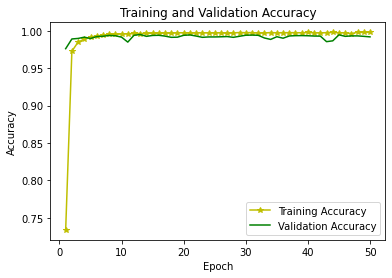

In [14]:
# Get training and test accuracy histories
training_acc = results.history['accuracy']
test_acc = results.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize history
plt.plot(epoch_count, training_acc, 'y-*')
plt.plot(epoch_count, test_acc, 'g-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Training and Validation Accuracy")
plt.show();

In [0]:
predictions = D_model.predict(x_test, verbose=0)

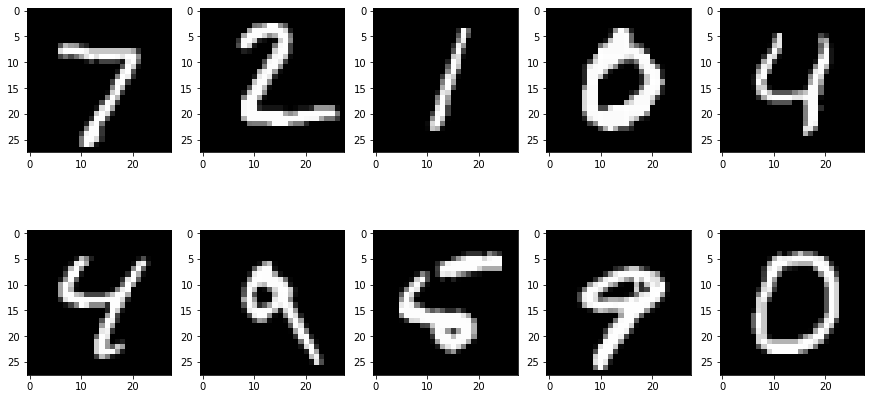

True labels
[7 2 1 0 4]
[4 9 5 9 0]
Classified as:
[7, 2, 1, 0, 4]
[4, 9, 5, 9, 0]


In [16]:
fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(regular_x_test[i], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(regular_x_test[i+6], interpolation='none', cmap=plt.cm.gray)
plt.show()

first_row = []
second_row = []
for i in range(5):
    index = np.argmax(predictions[i])
    first_row.append(index)
    index2 = np.argmax(predictions[i+6])
    second_row.append(index2)

print("True labels")
print(y_test[:5])
print(y_test[6:11])

print("Classified as:")
print(first_row)
print(second_row)


# CIFAR10 dataset

In [19]:
(cifar_train_x, cifar_train_y),(cifar_test_x, cifar_test_y) = keras.datasets.cifar10.load_data()

#Normalize
cifar_train_x ,cifar_test_x = cifar_train_x / 255.0, cifar_test_x / 255.0

print("Cifar train images: ",cifar_train_x.shape)
print("Cifar train labels: ",cifar_train_y.shape)
print("Cifar test images: ",cifar_test_x.shape)
print("Cifar test labels: ",cifar_test_y.shape)


170500096/170498071 [==============================] - 4s 0us/step
Cifar train images:  (50000, 32, 32, 3)
Cifar train labels:  (50000, 1)
Cifar test images:  (10000, 32, 32, 3)
Cifar test labels:  (10000, 1)


Let's plot the first 10 images of the cifar dataset

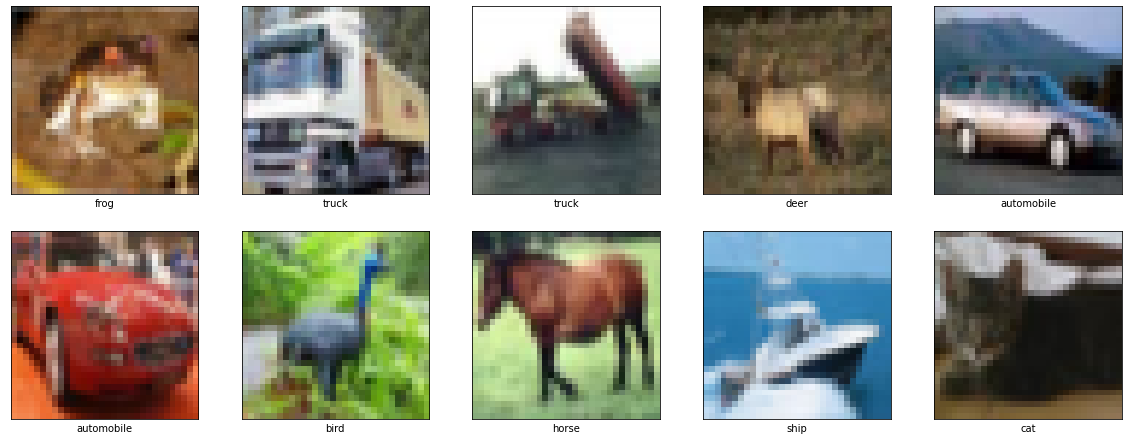

In [20]:
class_names = ['airplane','automobile', 'bird', 'cat','deer',
               'dog','frog','horse','ship','truck']


plt.figure(figsize = (20,20))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cifar_train_x[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[cifar_train_y[i][0]])
plt.show()

In [0]:
# D_model.compile(
#       loss='binary_crossentropy',
#       optimizer=RMSprop(lr=1e-5),
#       metrics=['accuracy']
# )

D_model.compile(
   loss=tf.keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
   optimizer=tf.keras.optimizers.RMSprop(5e-4),
   metrics=['accuracy']
) 

# D_model.compile(
#       loss=tf.keras.losses.SparseCategoricalCrossentropy(name='sparse_categorical_crossentropy',),
#       optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
#       metrics=['accuracy']
# )

# D_model.compile(
#       loss=tf.keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
#       optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
#       metrics=['accuracy']
# )

# D_model.compile(
#       loss=tf.keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
#       optimizer=tf.keras.optimizers.Adam(),
#       metrics=['accuracy']
# )



In [0]:
cifar_train_y_onehot = keras.utils.to_categorical(cifar_train_y, number_classes)
cifar_test_y_onehot = keras.utils.to_categorical(cifar_test_y, number_classes)

In [23]:
EPOCHS = 50

cifar_results = D_model.fit(
    cifar_train_x,cifar_train_y_onehot,batch_size=128,epochs=EPOCHS,validation_data=(cifar_test_x,cifar_test_y_onehot),
    verbose=1,shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 373us/step - loss: 2.3044 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 18s 356us/step - loss: 2.4493 - accuracy: 0.1010 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 18s 357us/step - loss: 2.2391 - accuracy: 0.1428 - val_loss: 1.9714 - val_accuracy: 0.2177
Epoch 4/50
50000/50000 [==============================] - 18s 357us/step - loss: 1.8539 - accuracy: 0.2618 - val_loss: 1.7133 - val_accuracy: 0.3155
Epoch 5/50
50000/50000 [==============================] - 18s 357us/step - loss: 1.6404 - accuracy: 0.3548 - val_loss: 1.6318 - val_accuracy: 0.3780
Epoch 6/50
50000/50000 [==============================] - 18s 357us/step - loss: 1.4541 - accuracy: 0.4529 - val_loss: 1.3788 - val_accuracy: 0.5086
Epoch 7/50
50000/50000 [==============================] 

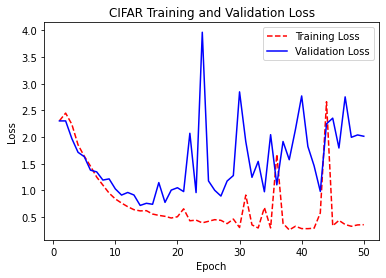

In [24]:
# Get training and test loss histories
cifar_training_loss = cifar_results.history['loss']
cifar_test_loss = cifar_results.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(cifar_training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, cifar_training_loss, 'r--')
plt.plot(epoch_count, cifar_test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("CIFAR Training and Validation Loss")
plt.show();

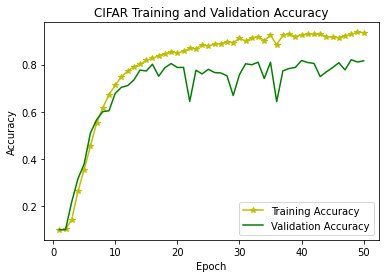

In [25]:
# Get training and test accuracy histories
cifar_training_accuracy = cifar_results.history['accuracy']
cifar_test_accuracy = cifar_results.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(cifar_training_accuracy) + 1)

# Visualize history
plt.plot(epoch_count, cifar_training_accuracy, 'y-*')
plt.plot(epoch_count, cifar_test_accuracy, 'g-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("CIFAR Training and Validation Accuracy")
plt.show();

In [0]:
predictions = D_model.predict(cifar_test_x, verbose=0)

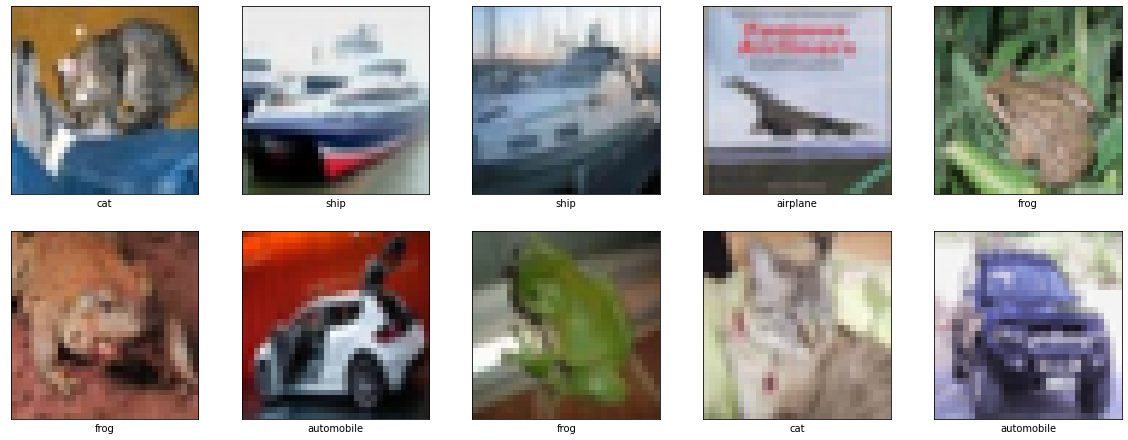

True labels:
['[3]', '[8]', '[8]', '[0]', '[6]', '[6]', '[1]', '[6]', '[3]', '[1]']
Classified as:
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]


In [27]:
class_names = ['airplane','automobile', 'bird', 'cat','deer',
               'dog','frog','horse','ship','truck']


plt.figure(figsize = (20,20))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cifar_test_x[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[cifar_test_y[i][0]])
plt.show()


predictions_array = []
true_labels = []
for i in cifar_test_y[:10]:
  index = str(i)
  true_labels.append(index)
for i in predictions[:10]:
  predictions_array.append(np.argmax(i))


print("True labels:")
print(true_labels)
print("Classified as:")
print(predictions_array)